#Part 1: Introduction to Research Environment

In [1]:
from quantopian.interactive.data.sentdex import sentiment

Above, we're bringing in the Sentdex sentiment dataset. The sentiment dataset provides sentiment data for companies from ~June 2013 onward for about 500 companies, and is free to use on Quantopian up to a rolling 1 month ago.
The Sentdex data provides a signal ranging from -3 to positive 6, where positive 6 is equally as positive as -3 is negative, I just personally found it more necessary to have granularity on the positive side of the scale.

We will also import the Q1500, which is Quantopian's sort of "index" that tracks 1500 of the most liquid companies that make the most sense for trading. The idea here is that, in order to properly back-test, you're assuming your shares will actually move at a fair pace. They might take a minute to fill, but we're not expecting them to take days. The Q1500 is a nightly updated list of acceptable companies that we can rely on to be liquid.

In [2]:
from quantopian.pipeline.filters.morningstar import Q1500US

In [3]:
type(sentiment)

<class 'blaze.expr.expressions.Field'>

Note that the datasets you import in the Research section are Blaze expressions. More info: https://blaze.readthedocs.io/en/latest/

We can see the attributes:

In [4]:
dir(sentiment)

['apply',
 u'asof_date',
 'cast',
 'count',
 'count_values',
 'distinct',
 'dshape',
 'fields',
 'head',
 'isidentical',
 'map',
 'ndim',
 'nelements',
 'nrows',
 'nunique',
 'peek',
 'relabel',
 'sample',
 'schema',
 u'sentiment_signal',
 'shape',
 'shift',
 u'sid',
 'sort',
 u'symbol',
 'tail',
 u'timestamp']

Blaze abstracts out computation and storage, aiming to give you faster speeds. From what I've seen blaze is about 4-6x faster than your typical pandas dataframe. Considering the sizes of the dataframes we're using here and the compute times, this is a great improvement, we'll take it.
As far as we're concerned, however, we're mostly going to just treat this like a pandas dataframe. For example:

In [5]:
BAC = symbols('BAC').sid
bac_sentiment = sentiment[ (sentiment.sid==BAC) ]
bac_sentiment.head()

symbol  sentiment_signal    sid  asof_date  timestamp
0    BAC               6.0  700.0 2012-11-14 2012-11-15
1    BAC               1.0  700.0 2012-11-15 2012-11-16
2    BAC              -1.0  700.0 2012-11-16 2012-11-17
3    BAC              -1.0  700.0 2012-11-17 2012-11-18
4    BAC              -1.0  700.0 2012-11-18 2012-11-19
5    BAC               6.0  700.0 2012-11-19 2012-11-20
6    BAC               6.0  700.0 2012-11-20 2012-11-21
7    BAC               6.0  700.0 2012-11-21 2012-11-22
8    BAC               6.0  700.0 2012-11-22 2012-11-23
9    BAC               6.0  700.0 2012-11-23 2012-11-24

While .head() is going to still work, .peek() is blaze, and quicker

In [6]:
bac_sentiment.peek()

symbol  sentiment_signal    sid  asof_date  timestamp
0     BAC               6.0  700.0 2012-11-14 2012-11-15
1     BAC               1.0  700.0 2012-11-15 2012-11-16
2     BAC              -1.0  700.0 2012-11-16 2012-11-17
3     BAC              -1.0  700.0 2012-11-17 2012-11-18
4     BAC              -1.0  700.0 2012-11-18 2012-11-19
5     BAC               6.0  700.0 2012-11-19 2012-11-20
6     BAC               6.0  700.0 2012-11-20 2012-11-21
7     BAC               6.0  700.0 2012-11-21 2012-11-22
8     BAC               6.0  700.0 2012-11-22 2012-11-23
9     BAC               6.0  700.0 2012-11-23 2012-11-24
10    BAC               6.0  700.0 2012-11-24 2012-11-25

In most cases, you're going to just run some computations in the form of filters and factors, but, if you did want to do some pandas-specific things on this data, you would first need to convert it back to a dataframe. For example, if you wanted to utilize the .plot attribute that a dataframe has, you would need to do this:

In [7]:
import blaze

bac_sentiment = blaze.compute(bac_sentiment)
type(bac_sentiment)

<class 'pandas.core.frame.DataFrame'>

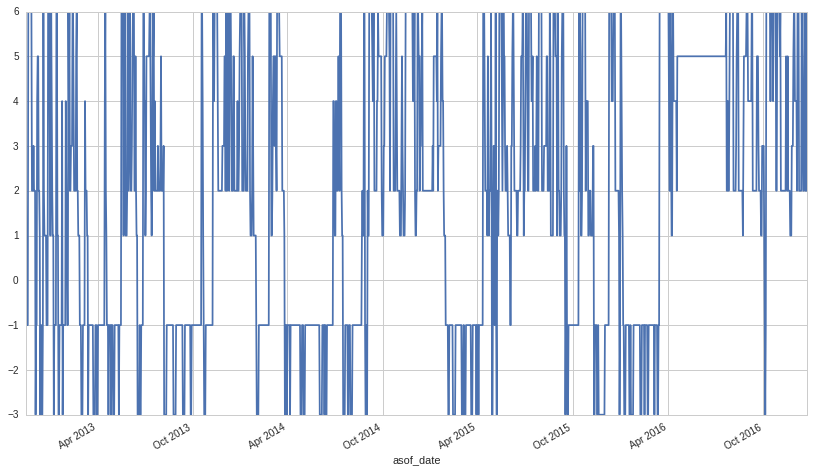

In [8]:
bac_sentiment.set_index('asof_date', inplace=True)
bac_sentiment['sentiment_signal'].plot()

The sentiment signals are generated by moving average crossovers generated straight from raw sentiment. Initially, those moving averages are going to be quite wild, so you wouldn't want to use the earliest data. For example:

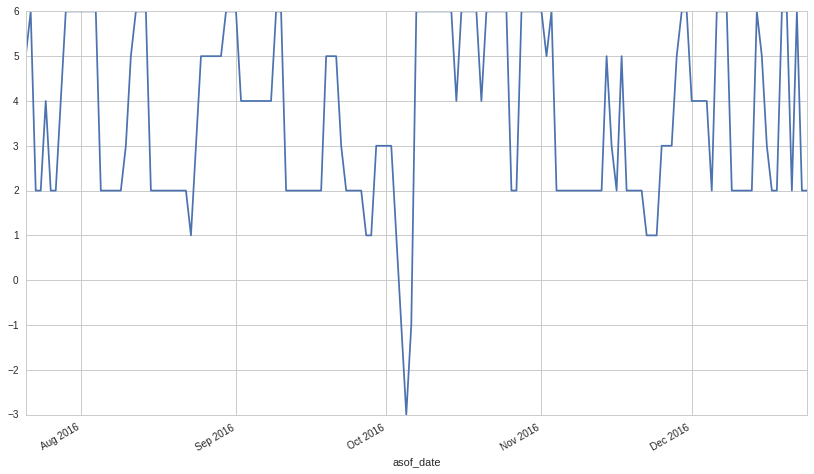

In [9]:
bac_sentiment = bac_sentiment[ (bac_sentiment.index > '2016-06-01') ]
bac_sentiment['sentiment_signal'].plot()